In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# data partition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import balanced_accuracy_score
from functools import reduce
from sklearn.utils import resample  # Upsampling
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier  # LightGBM
from sklearn.model_selection import GridSearchCV  # Hyperparameter Tuning
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE 

# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [5]:
# load total dataset (train and test data) with all created features 
total = pd.read_csv('20211202_total_features.csv')
#sample = pd.read_csv('sample_submission.csv')

In [6]:
# train data 
train = total.loc[total['set'] == 'train']

In [7]:
# test data
test = total.loc[total['set'] == 'test']
test = test.drop('Buy', axis = 1) # axis = 1 --> columns (0 -> rows)

In [8]:
# set Access_ID as index
train.set_index('Access_ID', inplace = True)
test.set_index('Access_ID', inplace = True)

In [9]:
# keep y of train data
train_buy = pd.DataFrame(train['Buy'], index = train.index)

In [10]:
train.columns

Index(['OS', 'Browser', 'Country', 'Type_of_Traffic', 'Buy', 'set',
       'Date_month', 'Date_month_2', 'Date_month_3', 'Date_month_5',
       ...
       'AvgTimeProductPct', 'AvgTimeAccountMngPct', 'FAQPPct', 'ProductPPct',
       'AccountMngPPct', 'Type_of_Traffic_PCA1', 'Type_of_Traffic_PCA2',
       'Type_of_Traffic_PCA3', 'Type_of_Traffic_PCA4', 'Type_of_Traffic_PCA5'],
      dtype='object', length=159)

In [11]:
features = [ #General Features
          'GoogleAnalytics_PageValue_log_scaled',
          'GoogleAnalytics_ExitRate_scaled',
          'GoogleAnalytics_BounceRate_scaled',

        #'GoogleAnalytics_ExitRate_BelowAVG',
       #'ExitRateBins_scaled',
       # 'BounceRateBins_scaled',
       #'ExitRateBins',
       #'BounceRateBins',
    
        #About Product Pages  
        'Product_Duration_log',
        #Totals
        'totalTimePages_avg',
        'AcctPageTime',
        'AccountMng_Pages_log',
        #About FAQ Pages
        
        #Date
        'Date_month_11', 
        'Date_month_5',
        
        
        #Remove the following variables
        #'Date_week',
        #'Date_month',
        #Until here
    
    
        #Traffic    
        'Type_of_Traffic_2',
        'Type_of_Traffic_1',
        #'Traffic25',
        
        #'source_Above_Mean',
        
        #Visitor
        'Type_of_Visitor_New_Access',
        'Type_of_Visitor_Returner',
        #'Visit25',
        #OS
        'OS_Windows',
        
        #Browser
        #'Browser_2',
        #'Browser_1',
        #'Browser_all',
        
        
        #Country
        #'IsEU',
    
        #Time
            #Transactions of 5 to 30 mins
         'time5TO30',
        #'GoogleAnalytics_PageValue_53',  # Meadian
        #'GoogleAnalytics_PageValue_32', # Mean
        
        # Transactions above 31mins to 1 hr
        'GoogleAnalytics_PageValue_22',
        'AcctPageTime31TO60',
        'time31TO60',
    
        #Transactions below 5 mins and above 1hr
        #'time0TO5',
        #'time61UP',
        
        #'FT10',
        'APT90',
        'FAPT0595',
        #'FT15',
        #'APT85',
        #'FT05','APT95',
    
    
    
        #New 30 Nov
    
        #'NewTimePV95',
        #'RetTimePV90',
        #'NewTimePV90',
        #'RetTimePV85',
        #'NewTime95',
        'RetTime90',
        'NewTime90',
        #'RetTime85',
        
        #Till here
        'Less5minExit', 
        'Less5minPValue',
    
        'GoogleAnalytics_PageValue_1'
        #'GoogleAnalytics_PageValue_7'
        ]

In [12]:
train[features].describe()

,GoogleAnalytics_PageValue_log_scaled,GoogleAnalytics_ExitRate_scaled,GoogleAnalytics_BounceRate_scaled,Product_Duration_log,totalTimePages_avg,AcctPageTime,AccountMng_Pages_log,Date_month_11,Date_month_5,Type_of_Traffic_2,...,GoogleAnalytics_PageValue_22,AcctPageTime31TO60,time31TO60,APT90,FAPT0595,RetTime90,NewTime90,Less5minExit,Less5minPValue,GoogleAnalytics_PageValue_1
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.0,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.106890,0.215907,0.111527,5.957849,0.498830,34.010101,0.798409,0.243724,0.273227,0.315032,...,0.088409,0.0,0.144314,0.122212,0.096510,0.108111,0.012301,0.193519,0.297330,0.784678
std,0.216002,0.244226,0.243880,2.055381,0.169490,46.077546,0.864051,0.429350,0.445639,0.464552,...,0.283903,0.0,0.351426,0.327547,0.295304,0.310536,0.110232,0.395076,0.457106,0.411066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.071500,0.000000,5.217988,0.415696,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.125500,0.016000,6.396930,0.522590,20.000000,0.693147,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.250000,0.084000,7.293882,0.612448,41.000000,1.609438,0.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,11.066240,0.983000,722.000000,3.332205,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
train[features].isnull().sum()

GoogleAnalytics_PageValue_log_scaled    0
GoogleAnalytics_ExitRate_scaled         0
GoogleAnalytics_BounceRate_scaled       0
Product_Duration_log                    0
totalTimePages_avg                      0
AcctPageTime                            0
AccountMng_Pages_log                    0
Date_month_11                           0
Date_month_5                            0
Type_of_Traffic_2                       0
Type_of_Traffic_1                       0
Type_of_Visitor_New_Access              0
Type_of_Visitor_Returner                0
OS_Windows                              0
time5TO30                               0
GoogleAnalytics_PageValue_22            0
AcctPageTime31TO60                      0
time31TO60                              0
APT90                                   0
FAPT0595                                0
RetTime90                               0
NewTime90                               0
Less5minExit                            0
Less5minPValue                    

In [14]:
# Align the train and test data with your choice of features
train = train[features]
train = pd.merge(train, train_buy, left_index=True, right_index=True)
test = test[features]

In [15]:
# seperate dependent and independent variable 
X = train.drop('Buy', axis = 1) # axis = 1 --> columns (0 -> rows)
y = train['Buy']

In [16]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3,
                                                  random_state = 0,
                                                  stratify = y,
                                                  shuffle = True)

#### Upsampling

In [17]:
def resamplingDataPrep(X_train, y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [18]:
def upsample_SMOTE(X_train, y_train, ratio=0.2):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [19]:
resampled = resamplingDataPrep(X_train, y_train, 'Buy')
majority_class = resampled[0]
minority_class = resampled[1]

majority_class: 5913
minority_class: 1086


In [20]:
upsampled = upsample_SMOTE(X_train, y_train, ratio=0.3)


7686 7686


In [21]:
X_train = upsampled[0]
y_train = upsampled[1]

In [22]:
# initialize different models 

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LGBM', HistGradientBoostingClassifier(learning_rate=0.21, 
                                                      max_leaf_nodes=14, 
                                                      max_iter=25, 
                                                      random_state=23)))
models.append(('GBM',GradientBoostingClassifier(learning_rate=0.1, 
                                                      max_leaf_nodes=150,
                                                      min_samples_leaf=3,
                                                      max_depth=13, 
                                                      random_state=23)))


In [23]:
# apply different models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.754705 (0.021611)
LDA: 0.762043 (0.022415)
KNN: 0.712514 (0.029220)
CART: 0.677818 (0.025698)
NB: 0.634447 (0.020919)
SVM: 0.730650 (0.027147)
LGBM: 0.774655 (0.019308)
GBM: 0.781384 (0.018757)


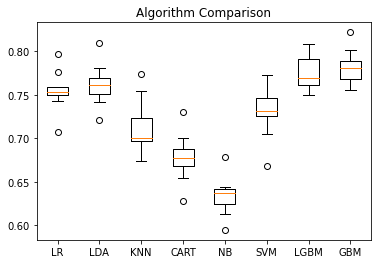

In [24]:
# Compare Algorithms by plots
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [25]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('LR: ' + str(f1_score(y_val, predictions)))

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('LDA: ' + str(f1_score(y_val, predictions)))

model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('KNN: ' + str(f1_score(y_val, predictions)))

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('CART: ' + str(f1_score(y_val, predictions)))

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('NB: ' + str(f1_score(y_val, predictions)))

model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('SVM: ' + str(f1_score(y_val, predictions)))

model = HistGradientBoostingClassifier(learning_rate=0.21, max_leaf_nodes=14, max_iter=25, random_state=23)
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('LGBM: ' + str(f1_score(y_val, predictions))) 

model = GradientBoostingClassifier(learning_rate=0.16, 
                                   #n_estimators=150,
                                     max_leaf_nodes=15,
                                      min_samples_leaf=3,
                                      max_depth=25, 
                                      random_state=23)

#(learning_rate=0.1, n_estimators=150, max_leaf_nodes=15, min_samples_leaf=3,max_depth=100, random_state=23)
model.fit(X_train, y_train)
predictions = model.predict(X_val)
print('GBM: ' + str(f1_score(y_val, predictions)))


LR: 0.6639427987742594
LDA: 0.6630434782608695
KNN: 0.541095890410959
CART: 0.5628865979381443
NB: 0.5271317829457365
SVM: 0.628930817610063
LGBM: 0.683076923076923
GBM: 0.6574468085106382


### Parameter Tuning of LGBM

In [26]:
import time
start_time = time.time()

learningRate = 0.10
leaf_nodes = 9
iterations = 15

scores = []
# learning rate
for i in range(0,10):
    leaf_nodes = 10
    learningRate += 0.01
    
    # leaf nodes
    for j in range(0,20):
        iterations = 20
        leaf_nodes += 1
        
        #iterations
        for k in range(0,20):
            model = HistGradientBoostingClassifier(learning_rate= learningRate, max_leaf_nodes= leaf_nodes, max_iter= iterations, random_state=23)
            model.fit(X_train, y_train)
            predictions = model.predict(X_val)
            
            check = f1_score(y_val, predictions)
            if check >=0.69:
                scores.append([check, np.round(learningRate,2), leaf_nodes, iterations])
                #print('LGBM: ' + str(check) + ', learning rate: ' + str(np.round(learningRate,2)) + ', leafs: ' + str(leaf_nodes) + ', iterations: ' + str(iterations))
            
            iterations += 5

lgbm_scores = pd.DataFrame(scores, columns=['Check', 'LearningRate', 'Leafs', 'Iterations']).sort_values(by='Check', ascending=False)

print("---RunTime: %s seconds ---" % (time.time() - start_time))

lgbm_scores.head(5)


---RunTime: 2450.7298500537872 seconds ---


,Check,LearningRate,Leafs,Iterations
10,0.693333,0.15,20,30
7,0.692784,0.14,12,55
2,0.692543,0.11,11,60
3,0.691914,0.11,11,65
1,0.691837,0.11,11,55


In [27]:
# Evaluate predictions 
#print(accuracy_score(y_val, predictions))
#print(confusion_matrix(y_val, predictions))
#print(classification_report(y_val, predictions))


### Make predictions on test data

In [28]:
#model = LogisticRegression(solver='liblinear', multi_class='ovr')
#model = LinearDiscriminantAnalysis()
#model = KNeighborsClassifier()
#model = DecisionTreeClassifier()
#model = GaussianNB()
#model = SVC(gamma='auto')
#learning rate: 0.18, leafs: 15, iterations: 85
# 0.694527 , LR: 17, Leafs:15, itter: 35
# learning_rate=0.18, max_leaf_nodes=11, max_iter=45 score: 0.697342

#model = HistGradientBoostingClassifier(learning_rate=0.21, max_leaf_nodes=29, max_iter=20, random_state=23)

# .72 score model = HistGradientBoostingClassifier(learning_rate=0.21, max_leaf_nodes=14, max_iter=25, random_state=23)

model = HistGradientBoostingClassifier(learning_rate=0.25, max_leaf_nodes=25, max_iter=30, random_state=23)

#model.fit(X_train, y_train)
model.fit(X_train, y_train)
#predictions_final = model.predict(test)
predictions_final = pd.DataFrame(model.predict(test), index=test.index)
predictions_final.columns = ['Buy']
predictions_final = predictions_final.reset_index()
predictions_final['Buy'] = predictions_final['Buy'].astype(int)


In [29]:

predictions_final['Buy'].loc[predictions_final['Buy']==1].count()/(predictions_final['Buy'].loc[predictions_final['Buy']==0].count()+predictions_final['Buy'].loc[predictions_final['Buy']==1].count())


0.15304347826086956

In [30]:
predictions_final.to_csv('20211129Y_submission_group12.csv', index=False)